In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [52]:
start='2010-01-01'
end='2021-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [53]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.551132
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.640778
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.465637
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838242


In [54]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [55]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


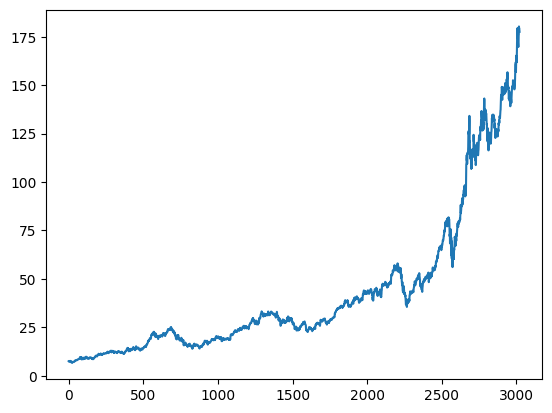

In [56]:
plt.plot(df.Close)

In [57]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

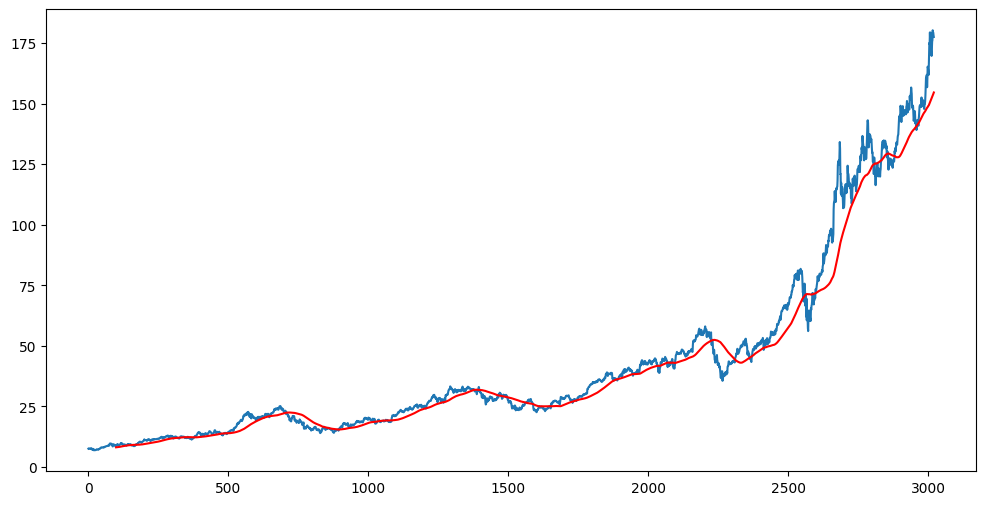

In [58]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [59]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

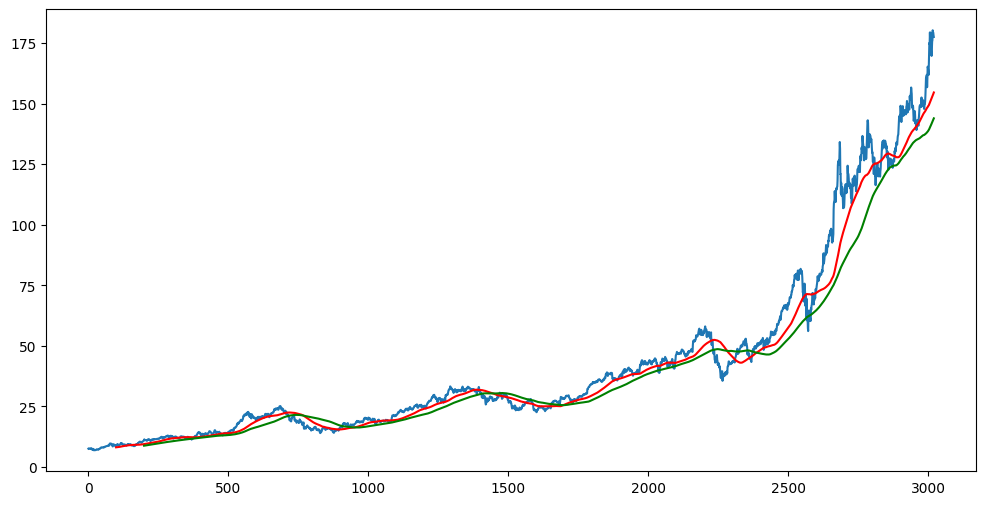

In [60]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [61]:
df.shape


(3022, 5)

In [62]:
# splitting Data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
data_training.shape


(2115, 1)

In [63]:
data_testing.shape

(907, 1)

In [64]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [65]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler=MinMaxScaler(feature_range=(0,1))


In [68]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [69]:
x_train=[]
y_train=[]

In [70]:
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


In [71]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [72]:
# ML Model

In [73]:
from keras.layers import Dense,Dropout,LSTM

In [74]:
from keras.models import Sequential

In [75]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [83]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
63/63 [==============================] - 31s 366ms/step - loss: 0.0084
Epoch 2/10
63/63 [==============================] - 23s 367ms/step - loss: 0.0063
Epoch 3/10
63/63 [==============================] - 21s 329ms/step - loss: 0.0052
Epoch 4/10
63/63 [==============================] - 20s 318ms/step - loss: 0.0060
Epoch 5/10
63/63 [==============================] - 21s 331ms/step - loss: 0.0051
Epoch 6/10
63/63 [==============================] - 22s 354ms/step - loss: 0.0042
Epoch 7/10
63/63 [==============================] - 22s 353ms/step - loss: 0.0039
Epoch 8/10
63/63 [==============================] - 22s 352ms/step - loss: 0.0040
Epoch 9/10
63/63 [==============================] - 22s 343ms/step - loss: 0.0040
Epoch 10/10
63/63 [==============================] - 23s 364ms/step - loss: 0.0035


In [84]:
# model.save('keras_model.h5')

In [85]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [86]:
past_100_days=data_training.tail(100)

In [87]:
final_df=past_100_days.append(data_testing,ignore_index=True)


C:\Users\Sahil\AppData\Local\Temp\ipykernel_17792\2155672971.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [88]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [89]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [90]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [91]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [92]:
x_test.shape

(907, 100, 1)

In [93]:
# Make pridiction

In [94]:
y_predicted=model.predict(x_test)

29/29 [==============================] - 2s 44ms/step


In [95]:
y_predicted.shape

(907, 1)

In [96]:
myscaler=scaler.scale_

In [97]:
scale_factor=1/myscaler

In [98]:
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor


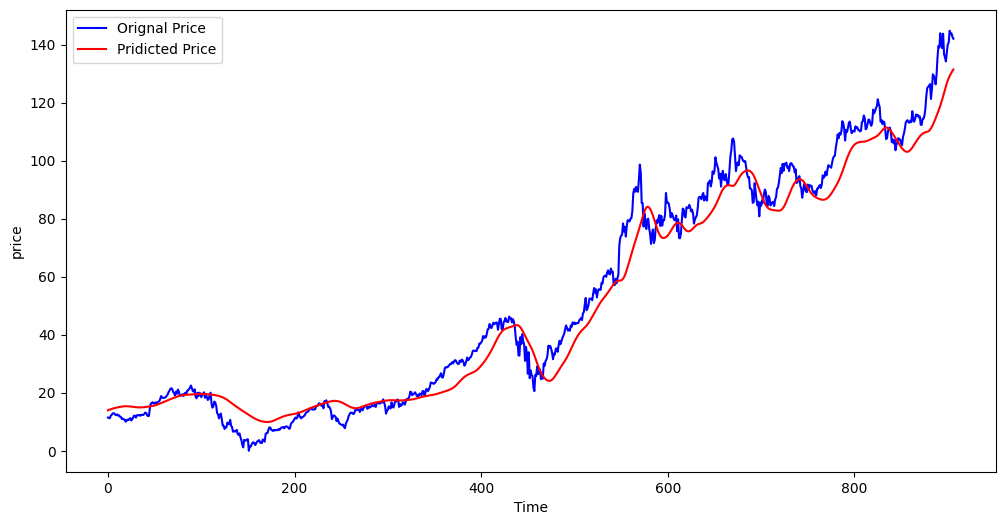

In [99]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Orignal Price')
plt.plot(y_predicted,'r',label='Pridicted Price')
plt.xlabel("Time")
plt.ylabel('price')
plt.legend()
plt.show()